In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import sqeuclidean
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

In [12]:
s = np.arange(100)
b = np.arange(100)
a = (5,9)
s[s == a[1]] = a[0]
print(s)
s[s > a[1]] -= 1
print(s)


[ 0  1  2  3  4  5  6  7  8  5 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98]
[ 0  1  2  3  4  5  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98]


In [15]:
class HierarchicalAgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

    @staticmethod
    def _ward_distance(c1, c2): #расчет расстояния между классами на основе расстония Уорда
        n1, n2 = len(c1), len(c2)
        c1_mean, c2_mean = np.mean(c1, axis=0), np.mean(c2, axis=0)
        sqeuclidean_dist = sqeuclidean(c1_mean, c2_mean)

        return (n1 * n2) / (n1 + n2) * sqeuclidean_dist

    @staticmethod
    def _update_labels(labels, min_cdist_idxs): #функция слияния кластеров - в больший по номеру кластер закидываем метку меньшего и отнимаем единицу
        #отнимаем единицу из меток кластеров больших номера большего кластера - чтобы не было пропусков в последовательности
        # assign a cluster number to labels
        labels[labels == min_cdist_idxs[1]] = min_cdist_idxs[0]
        labels[labels > min_cdist_idxs[1]] -= 1

        return labels

    def fit_predict(self, X):
        labels = np.arange(len(X))
        clusters = [[x] for x in X] #инициализация точечными кластерами

        while len(clusters) > self.n_clusters: #пока кластеров требуемого количества - т.е. пока не выстроилась иерархия
            min_cdist, min_cdist_idxs = np.inf, [] #задаем минимальное расстояние для поиска и индексы кластера

            for i in range(len(clusters) - 1):
                for j in range(i + 1, len(clusters)): #попарно вычисляем расстояния между всеми кластерами
                    cdist = self._ward_distance(clusters[i], clusters[j])
    
                    if cdist < min_cdist: #если рассстояние между кластерами меньше минимума, обновляем минимум
                        min_cdist = cdist
                        min_cdist_idxs = (i, j)

            labels = self._update_labels(labels, min_cdist_idxs) #сливаем кластеры
            clusters[min_cdist_idxs[0]].extend(clusters.pop(min_cdist_idxs[1]))

        return np.array(labels)

In [13]:
X2, y2 = make_blobs(n_samples=75, n_features=2, centers=5, random_state=0)
print(y2)



[0 3 4 3 2 4 0 2 0 4 2 4 2 2 0 0 0 3 2 0 2 2 2 3 4 1 1 2 3 0 4 4 3 3 3 2 2
 0 1 1 3 1 0 2 4 1 4 4 0 4 1 0 3 0 4 1 2 1 4 3 1 1 3 0 3 4 1 2 1 4 0 3 1 1
 3]


In [16]:
ac = HierarchicalAgglomerativeClustering(n_clusters=5)
ac_pred_res = ac.fit_predict(X2)
ac_ari = adjusted_rand_score(y2, ac_pred_res)
print(f'Adjusted Rand Score for AgglomerativeClustering: {ac_ari}', '', sep='\n')
print('prediction', ac_pred_res, sep='\n')

Adjusted Rand Score for AgglomerativeClustering: 0.8370870157432925

prediction
[0 1 2 0 3 2 0 3 0 2 3 2 3 3 0 0 0 1 3 0 3 3 0 1 2 4 4 3 1 3 2 2 1 1 1 3 3
 0 4 4 1 4 0 3 2 4 2 2 3 2 4 0 1 0 2 4 3 4 2 1 4 4 1 0 1 2 4 3 3 2 0 1 4 4
 1]


In [17]:
sk_ac = AgglomerativeClustering(n_clusters=5, linkage='ward')
sk_ac_pred_res = sk_ac.fit_predict(X2)
sk_ac_ari = adjusted_rand_score(y2, sk_ac_pred_res)
print(f'Adjusted Rand Score for sk AgglomerativeClustering: {sk_ac_ari}', '', sep='\n')
print('prediction', sk_ac_pred_res, sep='\n')


Adjusted Rand Score for sk AgglomerativeClustering: 0.8370870157432925

prediction
[4 2 1 4 0 1 4 0 4 1 0 1 0 0 4 4 4 2 0 4 0 0 4 2 1 3 3 0 2 0 1 1 2 2 2 0 0
 4 3 3 2 3 4 0 1 3 1 1 0 1 3 4 2 4 1 3 0 3 1 2 3 3 2 4 2 1 3 0 0 1 4 2 3 3
 2]


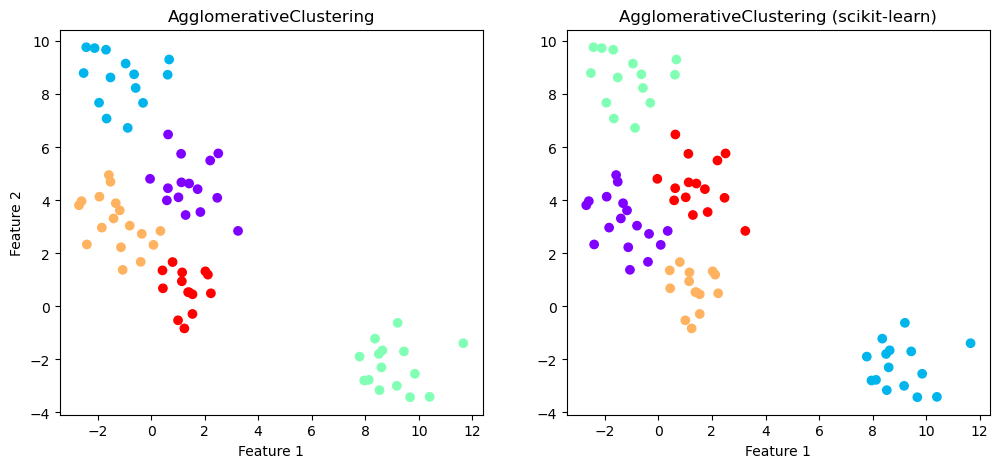

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=sk_ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

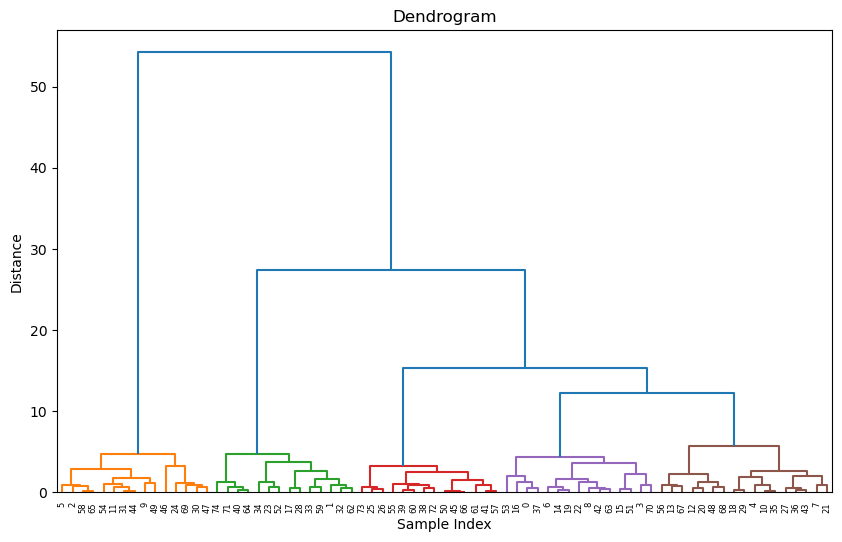

In [19]:
linkage_matrix = linkage(X2, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()